In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from matplotlib.lines import Line2D
from sklearn.metrics import r2_score
import matplotlib.colors as colors
import matplotlib.cm as cmx

from matplotlib.patches import Circle
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)
from matplotlib.cbook import get_sample_data
import matplotlib.patches as mpatches

from utils import utils

In [6]:
main = pd.read_csv(r"data/train_dm300.csv")
groups = main.groupby('solvent_name')

In [12]:
total_smiles = utils.smiles_concat(main.solute_smiles.to_list(), main.solvent_smiles.to_list())
main['full_smiles'] = total_smiles
main.to_csv(r"./data/train_dm300_full.csv")

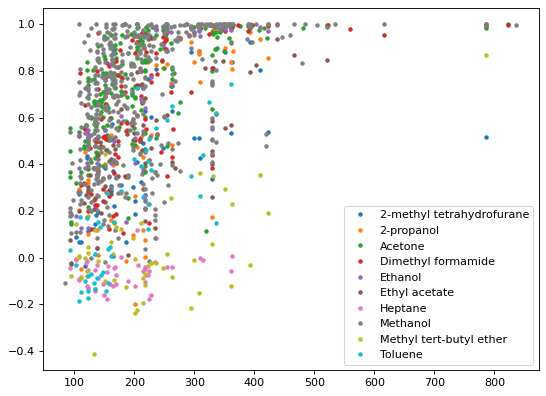

In [5]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=80)
plt.scatter(x=main['mw'], y=main['dm300'], s=2)
for name, group in groups:
    ax.plot(group.mw, group.dm300, marker='o', linestyle='', ms=3, label=name)
ax.legend()


In [6]:

def rejection_diagram(x: str, y: str, data: pd.DataFrame, x_axis: str, y_axis: str, group="solvent-name"):
    """
    :x: measured data
    :y: predicted data
    :data: pandas dataframe
    :x_axis: Label name on the X-axis
    :y_axis: Label name on the Y-axis
    """
    plt.figure(figsize=(10,8), tight_layout=True)
    ax = plt.axes()
    ax.set(facecolor = "white")
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    _data = data.dropna(subset=[x])
    x_values=_data[x]
    y_values=_data[y]
    
    # Get unique names of species
    uniq = list(set(_data[group]))

    # Set the color map to match the number of species
    z = range(1,len(uniq))
    hot = plt.get_cmap('tab20')
    cNorm  = colors.Normalize(vmin=0, vmax=len(uniq))
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=hot)

    markers = ["o", "v", "^", "<", ">", "1", "2",
                "3", "4", "8", "s", "p", "P", "*",
                "h", "H", "+", "x", "X", "D", "d"]

    for enum, (k, i) in enumerate(zip(uniq, markers)):
        indx = _data[group] == k
        plt.scatter(x_values[indx], y_values[indx], s=50, color=scalarMap.to_rgba(enum), label=k, marker=i)

    plt.legend()#loc='lower right', bbox_to_anchor=(2, 0))
    # plt.ylim(-1,3)

    # z = np.polyfit(_data[x], _data[y], 1)
    # p = np.poly1d(z)
    # y_hat = np.poly1d(z)(_data[x])

    # r_square = r2_score(_data[y], y_hat)
    # plt.plot(_data[x],p(_data[x]),"-")
    
    
    # text = f"$y={z[0]:0.3f}\;x{z[1]:+0.3f}$\n$R^2 = {r2_score(_data[y],y_hat):0.3f}$"
    # plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes,
    #     fontsize=10, verticalalignment='top')

    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    

    # print('equation parameters: ', z)
    # print('r2 score', r_square)
    # return np.array(_data['polymer_type'].map(colors))[0]


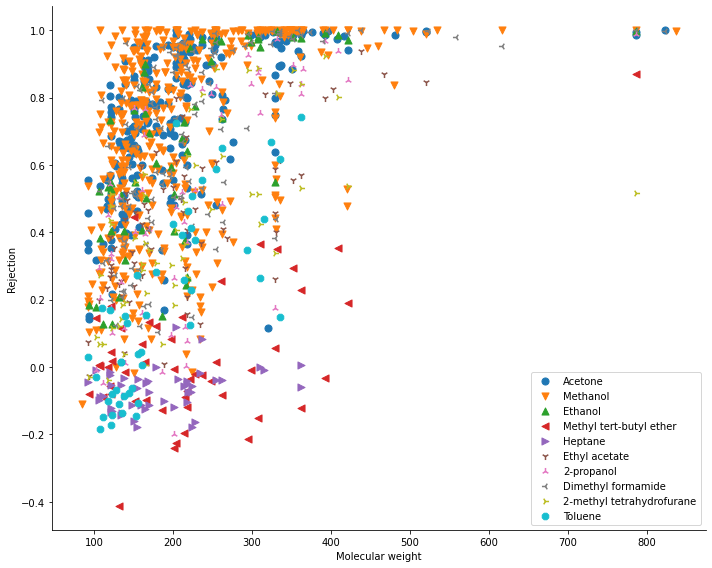

In [7]:
mwco_curve = rejection_diagram(x="mw", y="dm300", data=main, x_axis="Molecular weight", y_axis="Rejection")
plt.savefig(r"figures/mwco_curve.png")

<AxesSubplot:xlabel='mw', ylabel='dm300'>

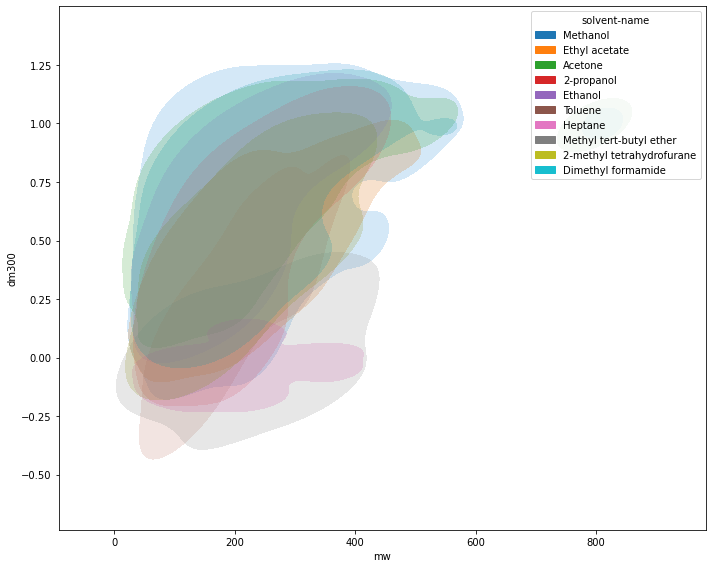

In [8]:
plt.figure(figsize=(10,8), tight_layout=True)
sns.kdeplot(data=main, x="mw", y="dm300", hue="solvent-name", shade=True, alpha=0.2, n_levels=2)

In [9]:
full_smiles = []
for indx, smile in enumerate(main["solute-smiles"]):
    full_smiles.append(smile + "." + main["solvent-smiles"][indx])

In [10]:
main["full-smiles"]=full_smiles

In [11]:
main.to_csv(r"data/main_to_train.csv")

In [15]:
main_to_train = pd.read_csv(r"./data/main_to_train.csv")

In [16]:
len(main_to_train["full-smiles"])

1170

In [17]:
len(main_to_train["dm300"])

1170

In [18]:
import rdkit
from rdkit import Chem

In [21]:
try:
    for smiles in main_to_train["full-smiles"]:
        mol = Chem.MolFromSmiles(smiles)
except:
    print("error")